In [1]:
import networkx as nx
import time
import resource 

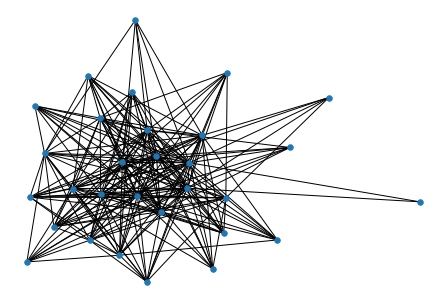

In [2]:
G_list = []
pos_G_list = []

for i in range(14):
    for j in range(100):
        G=nx.barabasi_albert_graph(30,i+2)
        G_list.append(G)
        pos_G = nx.spring_layout(G)
        pos_G_list.append(pos_G)
nx.draw(G, pos=pos_G, with_labels=False, node_size=30)

In [3]:
len(G_list)

1400

In [4]:
import math

def dot(v,w):
    x,y = v
    X,Y = w
    return x*X + y*Y

def length(v):
    x,y = v
    return math.sqrt(x*x + y*y)

def vector(b,e):
    x,y = b
    X,Y = e
    return (X-x, Y-y)

def unit(v):
    x,y = v
    mag = length(v)
    return (x/mag, y/mag)

def distance(p0,p1):
    return length(vector(p0,p1))

def scale(v,sc):
    x,y = v
    return (x * sc, y * sc)

def add(v,w):
    x,y = v
    X,Y = w
    return (x+X, y+Y)


def pnt2line(pnt, start, end):   #node position as input
    line_vec = vector(start, end)
    pnt_vec = vector(start, pnt)
    line_len = length(line_vec)
    line_unitvec = unit(line_vec)
    pnt_vec_scaled = scale(pnt_vec, 1.0/line_len)
    t = dot(line_unitvec, pnt_vec_scaled)    
    if t < 0.0:
        t = 0.0
    elif t > 1.0:
        t = 1.0
    nearest = scale(line_vec, t)
    dist = distance(nearest, pnt_vec)
    nearest = add(nearest, start)
    return dist


def dist_euclidean(p1, p2, pos):  #node name as input and pos to specify name of position variable for this graph
    x1, y1 = pos[p1]
    x2, y2 = pos[p2]
    return ((x2-x1)**2+(y2-y1)**2)**(1/2)

In [5]:

def dist_euclidean_G1(p1, p2):
    x1, y1 = pos_G1[p1]
    x2, y2 = pos_G1[p2]
    return ((x2-x1)**2+(y2-y1)**2)**(1/2)

In [6]:
def Human_gaze_algorithm(Graph, start_node, end_node, pos):
    current_node = start_node
    visited_nodes = [start_node]
    dead_nodes = []
    while current_node != end_node:
        neighbors = list(Graph.neighbors(current_node))
        for i in visited_nodes:
            if i in neighbors:
                neighbors.remove(i)
        for i in dead_nodes:
            if i in neighbors:
                neighbors.remove(i)
        
        
        if len(neighbors) == 0:
            visited_nodes.remove(current_node)
            dead_nodes.append(current_node)
            
            while len(neighbors) == 0:                                                  
                current_node = visited_nodes[-1]
                neighbors = list(Graph.neighbors(current_node))
                # is this still necessary if we have dead_nodes conditional
                for i in visited_nodes:
                    if i in neighbors:
                        neighbors.remove(i)
                for i in dead_nodes:
                    if i in neighbors:
                        neighbors.remove(i)
                visited_nodes.remove(current_node) 
                
            visited_nodes.append(current_node) 
            
        options = {} 
        
        for i in neighbors:
                options[i] = pnt2line(pos[i], pos[start_node], pos[end_node])
        current_node = min(options, key=options.get)
        visited_nodes.append(current_node)  
               
    return visited_nodes


def Human_gaze_algorithm_2(Graph, start_node, end_node, pos):
    current_node = start_node
    visited_nodes = [start_node]
    dead_nodes = [] # a node might be added multiple times to this know maybe as it was before might not be a problem
    while current_node != end_node:
        neighbors = list(Graph.neighbors(current_node))
        for i in visited_nodes:
            if i in neighbors:
                neighbors.remove(i)
        for i in dead_nodes:
            if i in neighbors:
                neighbors.remove(i)
        
        
        if len(neighbors) == 0:
            visited_nodes.remove(current_node)
            dead_nodes.append(current_node)
            
            while len(neighbors) == 0:                                                  
                current_node = visited_nodes[-1]
                neighbors = list(Graph.neighbors(current_node))
                # is this still necessary if we have dead_nodes conditional
                for i in visited_nodes:
                    if i in neighbors:
                        neighbors.remove(i)
                for i in dead_nodes:
                    if i in neighbors:
                        neighbors.remove(i)
                visited_nodes.remove(current_node) # instead of adding it again to visited nodes we want to take it away 
                
            visited_nodes.append(current_node) 
            
        options = {} 
        
        for i in neighbors:
                options[i] = pnt2line(pos[i], pos[current_node], pos[end_node])
        current_node = min(options, key=options.get)
        visited_nodes.append(current_node)  
               
    return visited_nodes


def Human_gaze_algorithm_3(Graph, start_node, end_node, pos):
    current_node = start_node
    visited_nodes = [start_node]
    dead_nodes = [] # a node might be added multiple times to this know maybe as it was before might not be a problem
    while current_node != end_node:
        neighbors = list(Graph.neighbors(current_node))
        for i in visited_nodes:
            if i in neighbors:
                neighbors.remove(i)
        for i in dead_nodes:
            if i in neighbors:
                neighbors.remove(i)
        
        
        if len(neighbors) == 0:
            visited_nodes.remove(current_node)
            dead_nodes.append(current_node)
            
            while len(neighbors) == 0:                                                  
                current_node = visited_nodes[-1]
                neighbors = list(Graph.neighbors(current_node))
                # is this still necessary if we have dead_nodes conditional
                for i in visited_nodes:
                    if i in neighbors:
                        neighbors.remove(i)
                for i in dead_nodes:
                    if i in neighbors:
                        neighbors.remove(i)
                visited_nodes.remove(current_node) # instead of adding it again to visited nodes we want to take it away 
                
            visited_nodes.append(current_node) 
            
        options = {} 
        
        for i in neighbors:
                options[i] = pnt2line(pos[i], pos[current_node], pos[end_node])
                options[i] += dist_euclidean(i, end_node, pos)
        current_node = min(options, key=options.get)
        visited_nodes.append(current_node)  
               
    return visited_nodes

In [7]:
# We only want the paths where HG is longer 
def compare_path(L1, L2): #inputs are the list of list(paths) for all node pairs for dijkstra and HG, same size lists
    different_path = []
    n = 0
    if L1 == L2:
        return "Equal"
    else:
        for i in range(len(L2)): #L1 and L2 should be the same length
            if len(L1[i]) < len(L2[i]):
                n += 1
                different_path.append([L1[i], L2[i]])
        #return [different_path, n, len(L1), n/len(L1)*100] 
        return different_path
    
def HG_error(L1, L2):
    n = 0
    if L1 == L2:
        return "Equal"
    else:
        for i in range(len(L2)): #L1 and L2 should be the same length
            if len(L1[i]) < len(L2[i]):
                n += 1
        #return [n, len(L1), n/len(L1)*100]
        return n/len(L1)*100
    
    
    
def compare_runtime(Graph, Graph_set_DG, Graph_set_HG, algorithm, pos): #always compare HG versions to dijkstra since we don't specify the alg. in the arguments
   
    time_start_DG = time.perf_counter()
    for i in list(Graph.nodes):
        for j in list(Graph.nodes):
            Graph_set_DG.append(nx.dijkstra_path(Graph, i, j))
    time_elapsed_DG = (time.perf_counter() - time_start_DG)
    memMb_DG=resource.getrusage(resource.RUSAGE_SELF).ru_maxrss/1024.0/1024.0
    
    time_start_HG = time.perf_counter()
    for i in list(Graph.nodes):
        for j in list(Graph.nodes):
            Graph_set_HG.append(algorithm(Graph, i, j, pos))
    time_elapsed_HG = (time.perf_counter() - time_start_HG)
    memMb_HG=resource.getrusage(resource.RUSAGE_SELF).ru_maxrss/1024.0/1024.0
    
    

    
    return print ( "%5.1f secs %5.1f MByte" % (time_elapsed_HG,memMb_HG), "%5.1f secs %5.1f MByte" % (time_elapsed_DG,memMb_DG))

In [8]:
# Create 19 empty list for each graph for each algorithm (Dijkstra, Version 1, 2 and 3)
for k in range(1,1401):
    exec(f'DG_{k} = []')  #The variables will be DG_1, DG_2 etc..
    
for k in range(1,1401): 
    exec(f'HG1_{k} = []')    
    
for k in range(1,1401):
    exec(f'HG2_{k} = []') 

for k in range(1,1401):
    exec(f'HG3_{k} = []')    
    
for k in range(1,2401):
    exec(f'A_{k} = []') 

In [9]:
# Writing them all out

# As all these list are global variables running this cell multiple times willcontinue to add all the node pairs
# Only run once

DG_list = []

for k in range(1,1401):
    exec(f'DG_{k} = []')
    exec(f'DG_list.append(DG_{k})')

for k in range(len(G_list)):
    for i in list(G_list[k].nodes):
        for j in list(G_list[k].nodes):
            DG_list[k].append(nx.dijkstra_path(G_list[k], i, j))
            
HG1_list = []

for k in range(1,1401):
    exec(f'HG1_{k} = []')
    exec(f'HG1_list.append(HG1_{k})')
    
for k in range(len(G_list)):
    for i in list(G_list[k].nodes):
        for j in list(G_list[k].nodes):
            HG1_list[k].append(Human_gaze_algorithm(G_list[k],i,j,pos_G_list[k]))
            

HG2_list = []

for k in range(1,1401):
    exec(f'HG2_{k} = []')
    exec(f'HG2_list.append(HG2_{k})')
    
for k in range(len(G_list)):
    for i in list(G_list[k].nodes):
        for j in list(G_list[k].nodes):
            HG2_list[k].append(Human_gaze_algorithm_2(G_list[k],i,j,pos_G_list[k]))
            
HG3_list = []

for k in range(1,1401):
    exec(f'HG3_{k} = []')
    exec(f'HG3_list.append(HG3_{k})')
    
for k in range(len(G_list)):
    for i in list(G_list[k].nodes):
        for j in list(G_list[k].nodes):
            HG3_list[k].append(Human_gaze_algorithm_3(G_list[k],i,j,pos_G_list[k]))
            
            

In [10]:
for i in range(len(G_list)):
    print(compare_path(DG_list[i], HG1_list[i]))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




[[[0, 5, 2], [0, 8, 9, 1, 11, 2]], [[0, 5, 4], [0, 11, 2, 5, 4]], [[0, 6, 12], [0, 8, 6, 12]], [[0, 5, 15], [0, 8, 6, 15]], [[0, 6, 17], [0, 5, 1, 17]], [[0, 7, 19], [0, 5, 14, 3, 25, 9, 13, 10, 19]], [[0, 6, 20], [0, 9, 18, 20]], [[0, 6, 21], [0, 8, 11, 21]], [[0, 5, 22], [0, 6, 2, 7, 22]], [[0, 6, 24], [0, 8, 11, 24]], [[0, 9, 25], [0, 5, 14, 25]], [[0, 7, 26], [0, 6, 2, 12, 9, 26]], [[0, 5, 28], [0, 7, 1, 9, 18, 2, 10, 28]], [[0, 5, 3, 29], [0, 9, 18, 2, 7, 1, 6, 20, 17, 22, 29]], [[1, 5, 2], [1, 9, 5, 2]], [[1, 5, 3], [1, 10, 17, 7, 3]], [[1, 5, 4], [1, 9, 5, 4]], [[1, 5, 13], [1, 17, 10, 13]], [[1, 5, 14], [1, 9, 5, 14]], [[1, 5, 18], [1, 7, 9, 18]], [[1, 6, 20], [1, 7, 22, 5, 18, 20]], [[1, 6, 21], [1, 9, 12, 21]], [[1, 6, 24], [1, 9, 12, 21, 2, 5, 6, 24]], [[1, 9, 25], [1, 5, 9, 25]], [[1, 5, 28], [1, 7, 17, 10, 28]], [[1, 19, 29], [1, 7, 9, 18, 5, 28, 29]], [[2, 5, 4], [2, 11, 8, 14, 12, 9, 1, 6, 0, 5, 4]], [[2, 5, 14], [2, 11, 1, 9, 8, 14]], [[2, 5, 22], [2, 6, 12, 9, 18, 20,

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [11]:
for i in range(len(G_list)):
    print(compare_path(DG_list[i], HG2_list[i]))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




[[[0, 11, 1], [0, 24, 14, 1]], [[0, 11, 2], [0, 24, 14, 2]], [[0, 11, 5], [0, 21, 25, 8, 22, 5]], [[0, 11, 7], [0, 21, 17, 7]], [[0, 11, 9], [0, 22, 18, 9]], [[0, 11, 27], [0, 13, 15, 18, 27]], [[0, 11, 29], [0, 13, 11, 29]], [[1, 11, 0], [1, 14, 24, 0]], [[1, 11, 5], [1, 14, 21, 25, 8, 22, 5]], [[1, 11, 8], [1, 20, 5, 22, 8]], [[1, 11, 9], [1, 12, 18, 9]], [[2, 11, 0], [2, 14, 24, 0]], [[2, 11, 9], [2, 16, 15, 9]], [[2, 11, 18], [2, 16, 15, 18]], [[2, 11, 23], [2, 14, 1, 23]], [[2, 12, 25], [2, 17, 21, 25]], [[3, 11, 2], [3, 29, 16, 2]], [[3, 11, 5], [3, 16, 20, 5]], [[3, 11, 7], [3, 29, 16, 7]], [[3, 11, 18], [3, 29, 15, 18]], [[3, 11, 19], [3, 12, 24, 19]], [[3, 11, 23], [3, 14, 1, 23]], [[3, 12, 25], [3, 11, 13, 25]], [[3, 11, 27], [3, 29, 16, 27]], [[4, 11, 0], [4, 28, 19, 0]], [[4, 11, 2], [4, 23, 1, 14, 2]], [[4, 11, 3], [4, 23, 7, 12, 3]], [[4, 11, 5], [4, 19, 25, 8, 22, 5]], [[4, 11, 17], [4, 14, 12, 17]], [[4, 11, 27], [4, 14, 16, 27]], [[4, 11, 29], [4, 14, 12, 29]], [[5, 1

In [12]:
for i in range(len(G_list)):
    print(compare_path(DG_list[i], HG3_list[i]))

[[[0, 2, 3, 6], [0, 2, 4, 8, 6]], [[0, 12, 9], [0, 7, 1, 2, 27, 24, 9]], [[0, 2, 13], [0, 7, 1, 5, 13]], [[0, 2, 3, 17], [0, 2, 19, 1, 3, 17]], [[0, 2, 5, 24], [0, 7, 1, 2, 13, 5, 24]], [[0, 2, 3, 25], [0, 2, 19, 1, 4, 25]], [[0, 2, 27], [0, 20, 3, 9, 24, 27]], [[0, 2, 4, 28], [0, 2, 23, 1, 5, 28]], [[1, 3, 6], [1, 4, 21, 2, 3, 6]], [[1, 3, 9], [1, 7, 0, 14, 9]], [[1, 3, 17], [1, 19, 2, 11, 3, 17]], [[1, 5, 18], [1, 22, 26, 18]], [[1, 3, 20], [1, 15, 3, 20]], [[1, 5, 24], [1, 2, 13, 5, 24]], [[1, 3, 25], [1, 19, 2, 21, 4, 25]], [[1, 4, 28], [1, 23, 2, 4, 28]], [[1, 5, 29], [1, 22, 26, 18, 29]], [[2, 3, 6], [2, 4, 8, 6]], [[2, 3, 9], [2, 0, 7, 1, 5, 9]], [[2, 0, 12], [2, 13, 5, 24, 9, 12]], [[2, 3, 17], [2, 19, 1, 3, 17]], [[2, 5, 18], [2, 13, 5, 18]], [[2, 0, 20], [2, 27, 24, 9, 14, 0, 20]], [[2, 5, 24], [2, 1, 5, 24]], [[2, 3, 25], [2, 19, 1, 4, 25]], [[2, 1, 22, 26], [2, 5, 29, 18, 26]], [[2, 4, 28], [2, 23, 1, 5, 28]], [[3, 2, 0], [3, 9, 24, 27, 2, 0]], [[3, 1, 4], [3, 6, 8, 4]], [[

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




[[[0, 4, 1], [0, 17, 4, 1]], [[0, 4, 8], [0, 5, 3, 8]], [[0, 4, 11], [0, 12, 3, 8, 6, 11]], [[0, 5, 13], [0, 4, 5, 13]], [[0, 12, 20], [0, 4, 22, 20]], [[0, 4, 21], [0, 15, 25, 21]], [[0, 5, 23], [0, 7, 19, 28, 3, 21, 23]], [[0, 4, 24], [0, 17, 20, 22, 24]], [[0, 17, 27], [0, 9, 6, 10, 13, 22, 20, 12, 14, 27]], [[0, 17, 28], [0, 7, 19, 28]], [[1, 4, 2], [1, 6, 9, 2]], [[1, 4, 7], [1, 23, 21, 3, 7]], [[1, 4, 8], [1, 5, 3, 8]], [[1, 20, 12], [1, 6, 8, 2, 12]], [[1, 5, 13], [1, 4, 5, 13]], [[1, 5, 14], [1, 6, 9, 2, 14]], [[1, 4, 15], [1, 18, 17, 21, 25, 15]], [[1, 4, 16], [1, 5, 3, 16]], [[1, 4, 21], [1, 19, 7, 0, 15, 25, 21]], [[1, 4, 25], [1, 18, 17, 21, 25]], [[1, 24, 27], [1, 20, 22, 24, 27]], [[1, 19, 28], [1, 23, 16, 3, 28]], [[2, 4, 6], [2, 12, 10, 6]], [[2, 4, 7], [2, 8, 3, 7]], [[2, 4, 10], [2, 9, 6, 10]], [[2, 4, 11], [2, 12, 3, 8, 6, 11]], [[2, 8, 13], [2, 4, 5, 13]], [[2, 4, 16], [2, 8, 3, 16]], [[2, 4, 19], [2, 8, 15, 25, 19]], [[2, 12, 20], [2, 9, 13, 22, 20]], [[2, 4, 22],

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




[[[0, 7, 2], [0, 15, 8, 2]], [[0, 7, 6], [0, 15, 5, 7, 6]], [[0, 9, 12], [0, 7, 17, 12]], [[0, 7, 13], [0, 15, 16, 13]], [[0, 7, 14], [0, 15, 18, 23, 14]], [[0, 7, 18], [0, 9, 14, 23, 18]], [[0, 7, 2, 21], [0, 9, 20, 10, 21]], [[0, 7, 26], [0, 15, 5, 7, 26]], [[1, 7, 4], [1, 25, 21, 4]], [[1, 7, 5], [1, 27, 19, 5]], [[1, 7, 6], [1, 13, 2, 26, 7, 6]], [[1, 7, 18], [1, 9, 14, 23, 18]], [[1, 7, 22], [1, 9, 23, 18, 22]], [[1, 8, 24], [1, 10, 20, 22, 24]], [[2, 7, 0], [2, 28, 14, 16, 15, 0]], [[2, 7, 1], [2, 19, 17, 1]], [[2, 7, 4], [2, 19, 25, 21, 4]], [[2, 7, 5], [2, 26, 12, 6, 7, 5]], [[2, 7, 6], [2, 26, 7, 6]], [[2, 7, 18], [2, 14, 23, 18]], [[2, 7, 20], [2, 21, 24, 22, 20]], [[2, 7, 22], [2, 11, 3, 22]], [[2, 7, 23], [2, 11, 18, 23]], [[2, 8, 24], [2, 11, 3, 22, 24]], [[3, 7, 0], [3, 18, 28, 14, 16, 15, 0]], [[3, 7, 5], [3, 12, 26, 2, 13, 1, 27, 19, 5]], [[3, 7, 6], [3, 13, 2, 26, 7, 6]], [[3, 7, 14], [3, 18, 23, 14]], [[3, 7, 17], [3, 10, 12, 17]], [[3, 7, 19], [3, 10, 12, 19]], [[3,

[[[0, 8, 2], [0, 16, 21, 2]], [[0, 8, 3], [0, 15, 5, 9, 3]], [[0, 8, 4], [0, 15, 24, 22, 4]], [[0, 8, 14], [0, 16, 10, 14]], [[0, 8, 18], [0, 16, 13, 18]], [[0, 9, 19], [0, 17, 24, 3, 19]], [[1, 8, 5], [1, 10, 15, 5]], [[1, 8, 14], [1, 21, 18, 10, 14]], [[1, 20, 24], [1, 8, 3, 24]], [[1, 10, 25], [1, 20, 6, 25]], [[1, 10, 26], [1, 21, 16, 0, 26]], [[2, 8, 0], [2, 18, 17, 0]], [[2, 8, 13], [2, 11, 9, 13]], [[2, 8, 15], [2, 11, 5, 15]], [[2, 9, 16], [2, 14, 10, 16]], [[2, 9, 20], [2, 23, 12, 20]], [[2, 11, 24], [2, 9, 3, 24]], [[2, 9, 25], [2, 23, 12, 20, 6, 25]], [[2, 10, 26], [2, 14, 28, 16, 0, 26]], [[2, 9, 29], [2, 18, 17, 29]], [[3, 8, 1], [3, 25, 21, 1]], [[3, 8, 4], [3, 24, 22, 4]], [[3, 12, 21], [3, 14, 2, 21]], [[4, 8, 1], [4, 22, 20, 1]], [[4, 9, 20], [4, 8, 6, 20]], [[4, 13, 21], [4, 10, 2, 21]], [[4, 22, 24], [4, 9, 3, 24]], [[4, 9, 25], [4, 8, 6, 25]], [[4, 10, 28], [4, 13, 16, 28]], [[4, 9, 29], [4, 13, 17, 29]], [[5, 8, 1], [5, 12, 20, 1]], [[5, 8, 4], [5, 24, 22, 4]], [[5

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [13]:
for i in range(len(G_list)):
    print(HG_error(DG_list[i], HG1_list[i]))

46.44444444444444
41.44444444444444
42.888888888888886
43.333333333333336
46.22222222222222
47.77777777777778
44.333333333333336
47.11111111111111
47.22222222222222
50.33333333333333
38.77777777777778
49.44444444444444
48.44444444444444
45.33333333333333
48.0
44.55555555555556
38.55555555555556
47.11111111111111
44.44444444444444
46.666666666666664
50.66666666666667
43.55555555555555
42.333333333333336
42.55555555555556
44.22222222222222
45.111111111111114
44.111111111111114
40.11111111111111
43.888888888888886
49.111111111111114
41.55555555555556
47.44444444444444
46.33333333333333
45.22222222222222
46.55555555555556
42.333333333333336
51.22222222222222
50.55555555555556
48.22222222222222
47.44444444444444
42.333333333333336
43.666666666666664
39.0
47.22222222222222
45.0
45.666666666666664
44.333333333333336
47.55555555555556
47.0
42.44444444444444
43.22222222222222
43.111111111111114
45.111111111111114
48.55555555555556
44.666666666666664
46.55555555555556
46.22222222222222
47.333333

12.0
14.222222222222221
14.777777777777779
14.333333333333334
13.666666666666666
16.88888888888889
17.333333333333336
13.0
17.444444444444446
13.777777777777779
12.666666666666668
13.88888888888889
13.222222222222221
12.88888888888889
16.77777777777778
13.333333333333334
13.333333333333334
13.555555555555557
14.222222222222221
15.0
12.777777777777777
14.222222222222221
14.888888888888888
14.333333333333334
15.88888888888889
13.88888888888889
16.0
14.888888888888888
14.777777777777779
15.222222222222223
14.11111111111111
15.444444444444445
13.555555555555557
15.333333333333332
13.555555555555557
13.666666666666666
12.88888888888889
14.333333333333334
15.444444444444445
13.111111111111112
15.0
14.777777777777779
12.777777777777777
13.444444444444445
14.888888888888888
13.333333333333334
14.888888888888888
13.88888888888889
14.444444444444443
15.777777777777777
12.444444444444445
14.777777777777779
14.11111111111111
12.0
15.444444444444445
14.777777777777779
13.444444444444445
14.22222222

In [14]:
for i in range(len(G_list)):
    print(HG_error(DG_list[i], HG3_list[i]))

36.44444444444444
28.22222222222222
35.11111111111111
36.11111111111111
43.666666666666664
36.11111111111111
36.888888888888886
37.333333333333336
36.77777777777778
31.444444444444446
30.11111111111111
42.55555555555556
37.333333333333336
37.111111111111114
35.22222222222222
30.0
26.0
39.33333333333333
27.0
37.666666666666664
36.11111111111111
35.0
28.77777777777778
31.333333333333336
34.11111111111111
35.44444444444444
29.11111111111111
37.0
36.888888888888886
38.77777777777778
31.0
37.333333333333336
39.111111111111114
41.44444444444444
34.77777777777778
33.33333333333333
40.0
45.0
34.11111111111111
34.22222222222222
33.22222222222222
37.44444444444445
26.333333333333332
39.22222222222223
38.88888888888889
33.33333333333333
32.88888888888889
42.55555555555556
32.55555555555556
34.0
27.666666666666668
28.888888888888886
34.22222222222222
38.77777777777778
33.0
35.11111111111111
37.22222222222222
38.22222222222222
39.33333333333333
39.111111111111114
35.22222222222222
36.22222222222222

19.555555555555557
20.666666666666668
19.0
17.555555555555554
20.22222222222222
20.666666666666668
14.777777777777779
17.22222222222222
18.0
19.555555555555557
19.555555555555557
16.333333333333332
18.22222222222222
18.11111111111111
14.777777777777779
17.444444444444446
21.0
18.11111111111111
14.000000000000002
16.444444444444446
16.444444444444446
13.555555555555557
16.555555555555557
16.77777777777778
15.555555555555555
16.666666666666664
16.444444444444446
15.333333333333332
19.333333333333332
18.555555555555557
18.444444444444443
18.444444444444443
16.88888888888889
16.77777777777778
21.444444444444443
19.444444444444446
19.444444444444446
16.555555555555557
22.77777777777778
18.0
15.88888888888889
19.444444444444446
15.222222222222223
22.88888888888889
21.11111111111111
18.666666666666668
16.77777777777778
19.11111111111111
17.333333333333336
16.0
16.555555555555557
17.77777777777778
15.11111111111111
15.222222222222223
15.333333333333332
21.333333333333336
18.555555555555557
16.

In [15]:

for i in range(len(G_list)):
    print(compare_runtime(G_list[i], DG_list[i], HG1_list[i], Human_gaze_algorithm, pos_G_list[i]))

  0.1 secs 666.2 MByte   0.0 secs 666.1 MByte
None
  0.1 secs 666.3 MByte   0.0 secs 666.3 MByte
None
  0.1 secs 666.4 MByte   0.0 secs 666.3 MByte
None
  0.1 secs 666.4 MByte   0.0 secs 666.4 MByte
None
  0.1 secs 666.4 MByte   0.0 secs 666.4 MByte
None
  0.1 secs 666.5 MByte   0.0 secs 666.5 MByte
None
  0.1 secs 666.5 MByte   0.0 secs 666.5 MByte
None
  0.1 secs 666.6 MByte   0.0 secs 666.6 MByte
None
  0.1 secs 666.6 MByte   0.0 secs 666.6 MByte
None
  0.1 secs 666.7 MByte   0.0 secs 666.7 MByte
None
  0.1 secs 666.7 MByte   0.0 secs 666.7 MByte
None
  0.1 secs 666.7 MByte   0.0 secs 666.7 MByte
None
  0.1 secs 666.7 MByte   0.0 secs 666.7 MByte
None
  0.1 secs 666.7 MByte   0.0 secs 666.7 MByte
None
  0.1 secs 666.7 MByte   0.0 secs 666.7 MByte
None
  0.1 secs 666.7 MByte   0.0 secs 666.7 MByte
None
  0.1 secs 666.7 MByte   0.0 secs 666.7 MByte
None
  0.1 secs 666.7 MByte   0.0 secs 666.7 MByte
None
  0.1 secs 666.7 MByte   0.0 secs 666.7 MByte
None
  0.1 secs 666.7 MByte   0.0 se

  0.1 secs 761.5 MByte   0.0 secs 761.4 MByte
None
  0.1 secs 761.6 MByte   0.0 secs 761.6 MByte
None
  0.1 secs 761.6 MByte   0.0 secs 761.6 MByte
None
  0.1 secs 761.6 MByte   0.0 secs 761.6 MByte
None
  0.1 secs 761.7 MByte   0.0 secs 761.6 MByte
None
  0.1 secs 761.9 MByte   0.0 secs 761.8 MByte
None
  0.1 secs 762.1 MByte   0.0 secs 762.0 MByte
None
  0.1 secs 762.1 MByte   0.0 secs 762.1 MByte
None
  0.1 secs 762.1 MByte   0.0 secs 762.1 MByte
None
  0.1 secs 762.1 MByte   0.0 secs 762.1 MByte
None
  0.1 secs 762.1 MByte   0.0 secs 762.1 MByte
None
  0.1 secs 762.3 MByte   0.0 secs 762.2 MByte
None
  0.1 secs 762.4 MByte   0.0 secs 762.4 MByte
None
  0.1 secs 762.4 MByte   0.0 secs 762.4 MByte
None
  0.1 secs 762.4 MByte   0.0 secs 762.4 MByte
None
  0.1 secs 762.6 MByte   0.0 secs 762.5 MByte
None
  0.1 secs 762.6 MByte   0.0 secs 762.6 MByte
None
  0.1 secs 762.6 MByte   0.0 secs 762.6 MByte
None
  0.1 secs 762.6 MByte   0.0 secs 762.6 MByte
None
  0.1 secs 762.6 MByte   0.0 se

  0.1 secs 776.5 MByte   0.0 secs 776.5 MByte
None
  0.2 secs 776.5 MByte   0.1 secs 776.5 MByte
None
  0.1 secs 776.5 MByte   0.0 secs 776.5 MByte
None
  0.1 secs 776.5 MByte   0.0 secs 776.5 MByte
None
  0.1 secs 776.5 MByte   0.0 secs 776.5 MByte
None
  0.1 secs 776.5 MByte   0.0 secs 776.5 MByte
None
  0.1 secs 776.5 MByte   0.1 secs 776.5 MByte
None
  0.1 secs 776.5 MByte   0.0 secs 776.5 MByte
None
  0.1 secs 776.5 MByte   0.0 secs 776.5 MByte
None
  0.1 secs 776.5 MByte   0.0 secs 776.5 MByte
None
  0.1 secs 776.5 MByte   0.0 secs 776.5 MByte
None
  0.1 secs 776.5 MByte   0.0 secs 776.5 MByte
None
  0.1 secs 776.5 MByte   0.0 secs 776.5 MByte
None
  0.1 secs 776.5 MByte   0.0 secs 776.5 MByte
None
  0.1 secs 776.5 MByte   0.0 secs 776.5 MByte
None
  0.1 secs 776.5 MByte   0.0 secs 776.5 MByte
None
  0.1 secs 776.5 MByte   0.0 secs 776.5 MByte
None
  0.1 secs 776.5 MByte   0.0 secs 776.5 MByte
None
  0.1 secs 776.5 MByte   0.0 secs 776.5 MByte
None
  0.1 secs 776.5 MByte   0.0 se

  0.1 secs 776.5 MByte   0.1 secs 776.5 MByte
None
  0.1 secs 776.5 MByte   0.1 secs 776.5 MByte
None
  0.1 secs 776.5 MByte   0.1 secs 776.5 MByte
None
  0.1 secs 776.5 MByte   0.0 secs 776.5 MByte
None
  0.1 secs 776.5 MByte   0.1 secs 776.5 MByte
None
  0.1 secs 776.5 MByte   0.1 secs 776.5 MByte
None
  0.1 secs 776.5 MByte   0.1 secs 776.5 MByte
None
  0.1 secs 776.5 MByte   0.1 secs 776.5 MByte
None
  0.1 secs 776.5 MByte   0.1 secs 776.5 MByte
None
  0.1 secs 776.5 MByte   0.1 secs 776.5 MByte
None
  0.1 secs 776.5 MByte   0.1 secs 776.5 MByte
None
  0.1 secs 776.5 MByte   0.1 secs 776.5 MByte
None
  0.1 secs 776.5 MByte   0.1 secs 776.5 MByte
None
  0.1 secs 776.5 MByte   0.0 secs 776.5 MByte
None
  0.1 secs 776.5 MByte   0.1 secs 776.5 MByte
None
  0.1 secs 776.5 MByte   0.1 secs 776.5 MByte
None
  0.1 secs 776.5 MByte   0.1 secs 776.5 MByte
None
  0.1 secs 776.5 MByte   0.1 secs 776.5 MByte
None
  0.1 secs 776.5 MByte   0.1 secs 776.5 MByte
None
  0.2 secs 776.5 MByte   0.1 se

  0.1 secs 776.5 MByte   0.1 secs 776.5 MByte
None
  0.1 secs 776.5 MByte   0.1 secs 776.5 MByte
None
  0.1 secs 776.5 MByte   0.1 secs 776.5 MByte
None
  0.1 secs 776.5 MByte   0.1 secs 776.5 MByte
None
  0.1 secs 776.5 MByte   0.1 secs 776.5 MByte
None
  0.1 secs 776.5 MByte   0.1 secs 776.5 MByte
None
  0.1 secs 776.5 MByte   0.1 secs 776.5 MByte
None
  0.1 secs 776.5 MByte   0.1 secs 776.5 MByte
None
  0.1 secs 776.5 MByte   0.1 secs 776.5 MByte
None
  0.1 secs 776.5 MByte   0.1 secs 776.5 MByte
None
  0.1 secs 776.5 MByte   0.1 secs 776.5 MByte
None
  0.1 secs 776.5 MByte   0.1 secs 776.5 MByte
None
  0.1 secs 776.5 MByte   0.1 secs 776.5 MByte
None
  0.1 secs 776.5 MByte   0.1 secs 776.5 MByte
None
  0.1 secs 776.5 MByte   0.1 secs 776.5 MByte
None
  0.1 secs 776.5 MByte   0.1 secs 776.5 MByte
None
  0.1 secs 776.5 MByte   0.1 secs 776.5 MByte
None
  0.1 secs 776.5 MByte   0.1 secs 776.5 MByte
None
  0.1 secs 776.5 MByte   0.1 secs 776.5 MByte
None
  0.1 secs 776.5 MByte   0.1 se

  0.1 secs 776.5 MByte   0.1 secs 776.5 MByte
None
  0.1 secs 776.5 MByte   0.1 secs 776.5 MByte
None
  0.1 secs 776.5 MByte   0.1 secs 776.5 MByte
None
  0.1 secs 776.5 MByte   0.1 secs 776.5 MByte
None
  0.1 secs 776.5 MByte   0.1 secs 776.5 MByte
None
  0.1 secs 776.5 MByte   0.1 secs 776.5 MByte
None
  0.1 secs 776.5 MByte   0.1 secs 776.5 MByte
None
  0.1 secs 776.5 MByte   0.1 secs 776.5 MByte
None
  0.1 secs 776.5 MByte   0.1 secs 776.5 MByte
None
  0.1 secs 776.5 MByte   0.1 secs 776.5 MByte
None
  0.1 secs 776.5 MByte   0.1 secs 776.5 MByte
None
  0.1 secs 776.5 MByte   0.1 secs 776.5 MByte
None
  0.1 secs 776.5 MByte   0.1 secs 776.5 MByte
None
  0.1 secs 776.5 MByte   0.1 secs 776.5 MByte
None
  0.1 secs 776.5 MByte   0.1 secs 776.5 MByte
None
  0.1 secs 776.5 MByte   0.1 secs 776.5 MByte
None
  0.1 secs 776.5 MByte   0.1 secs 776.5 MByte
None
  0.1 secs 776.5 MByte   0.1 secs 776.5 MByte
None
  0.1 secs 776.5 MByte   0.1 secs 776.5 MByte
None
  0.1 secs 776.5 MByte   0.1 se

  0.2 secs 907.0 MByte   0.1 secs 907.0 MByte
None
  0.2 secs 907.0 MByte   0.1 secs 907.0 MByte
None
  0.2 secs 907.0 MByte   0.1 secs 907.0 MByte
None
  0.1 secs 907.0 MByte   0.1 secs 907.0 MByte
None
  0.1 secs 907.0 MByte   0.1 secs 907.0 MByte
None
  0.1 secs 907.0 MByte   0.1 secs 907.0 MByte
None
  0.1 secs 907.0 MByte   0.1 secs 907.0 MByte
None
  0.1 secs 907.0 MByte   0.1 secs 907.0 MByte
None
  0.1 secs 907.0 MByte   0.1 secs 907.0 MByte
None
  0.1 secs 907.0 MByte   0.1 secs 907.0 MByte
None
  0.2 secs 907.0 MByte   0.1 secs 907.0 MByte
None
  0.1 secs 907.0 MByte   0.1 secs 907.0 MByte
None
  0.1 secs 907.0 MByte   0.1 secs 907.0 MByte
None
  0.1 secs 907.0 MByte   0.1 secs 907.0 MByte
None
  0.1 secs 907.0 MByte   0.1 secs 907.0 MByte
None
  0.1 secs 907.0 MByte   0.1 secs 907.0 MByte
None
  0.1 secs 907.0 MByte   0.1 secs 907.0 MByte
None
  0.1 secs 907.0 MByte   0.1 secs 907.0 MByte
None
  0.1 secs 907.0 MByte   0.1 secs 907.0 MByte
None
  0.1 secs 907.0 MByte   0.1 se

  0.1 secs 907.0 MByte   0.1 secs 907.0 MByte
None
  0.1 secs 907.0 MByte   0.1 secs 907.0 MByte
None
  0.1 secs 907.0 MByte   0.1 secs 907.0 MByte
None
  0.1 secs 907.0 MByte   0.1 secs 907.0 MByte
None
  0.1 secs 907.0 MByte   0.1 secs 907.0 MByte
None
  0.1 secs 907.0 MByte   0.1 secs 907.0 MByte
None
  0.1 secs 907.0 MByte   0.1 secs 907.0 MByte
None
  0.1 secs 907.0 MByte   0.1 secs 907.0 MByte
None
  0.2 secs 907.0 MByte   0.1 secs 907.0 MByte
None
  0.1 secs 907.0 MByte   0.1 secs 907.0 MByte
None
  0.1 secs 907.0 MByte   0.1 secs 907.0 MByte
None
  0.1 secs 907.0 MByte   0.1 secs 907.0 MByte
None
  0.1 secs 907.0 MByte   0.1 secs 907.0 MByte
None
  0.1 secs 907.0 MByte   0.1 secs 907.0 MByte
None
  0.1 secs 907.0 MByte   0.1 secs 907.0 MByte
None
  0.1 secs 907.0 MByte   0.1 secs 907.0 MByte
None
  0.1 secs 907.0 MByte   0.1 secs 907.0 MByte
None
  0.1 secs 907.0 MByte   0.1 secs 907.0 MByte
None
  0.1 secs 907.0 MByte   0.1 secs 907.0 MByte
None
  0.1 secs 907.0 MByte   0.1 se

  0.1 secs 907.0 MByte   0.1 secs 907.0 MByte
None
  0.2 secs 907.0 MByte   0.1 secs 907.0 MByte
None
  0.2 secs 907.0 MByte   0.1 secs 907.0 MByte
None
  0.1 secs 907.0 MByte   0.1 secs 907.0 MByte
None
  0.2 secs 907.0 MByte   0.1 secs 907.0 MByte
None
  0.2 secs 907.0 MByte   0.1 secs 907.0 MByte
None
  0.1 secs 907.0 MByte   0.1 secs 907.0 MByte
None
  0.1 secs 907.0 MByte   0.1 secs 907.0 MByte
None
  0.1 secs 907.0 MByte   0.1 secs 907.0 MByte
None
  0.2 secs 907.0 MByte   0.1 secs 907.0 MByte
None
  0.1 secs 907.0 MByte   0.1 secs 907.0 MByte
None
  0.1 secs 907.0 MByte   0.1 secs 907.0 MByte
None
  0.1 secs 907.0 MByte   0.1 secs 907.0 MByte
None
  0.1 secs 907.0 MByte   0.1 secs 907.0 MByte
None
  0.1 secs 907.0 MByte   0.1 secs 907.0 MByte
None
  0.1 secs 907.0 MByte   0.1 secs 907.0 MByte
None
  0.1 secs 907.0 MByte   0.1 secs 907.0 MByte
None
  0.1 secs 907.0 MByte   0.1 secs 907.0 MByte
None
  0.1 secs 907.0 MByte   0.1 secs 907.0 MByte
None
  0.1 secs 907.0 MByte   0.1 se

In [16]:
for i in range(len(G_list)):
    print(compare_runtime(G_list[i], DG_list[i], HG2_list[i], Human_gaze_algorithm_2, pos_G_list[i]))

  0.1 secs 907.0 MByte   0.0 secs 907.0 MByte
None
  0.1 secs 907.0 MByte   0.0 secs 907.0 MByte
None
  0.1 secs 907.0 MByte   0.0 secs 907.0 MByte
None
  0.1 secs 907.0 MByte   0.0 secs 907.0 MByte
None
  0.1 secs 907.0 MByte   0.0 secs 907.0 MByte
None
  0.1 secs 907.0 MByte   0.0 secs 907.0 MByte
None
  0.1 secs 907.0 MByte   0.0 secs 907.0 MByte
None
  0.1 secs 907.0 MByte   0.0 secs 907.0 MByte
None
  0.1 secs 907.0 MByte   0.0 secs 907.0 MByte
None
  0.1 secs 907.0 MByte   0.0 secs 907.0 MByte
None
  0.1 secs 907.0 MByte   0.0 secs 907.0 MByte
None
  0.1 secs 907.0 MByte   0.0 secs 907.0 MByte
None
  0.1 secs 907.0 MByte   0.0 secs 907.0 MByte
None
  0.1 secs 907.0 MByte   0.0 secs 907.0 MByte
None
  0.1 secs 907.0 MByte   0.0 secs 907.0 MByte
None
  0.1 secs 907.0 MByte   0.0 secs 907.0 MByte
None
  0.1 secs 907.0 MByte   0.0 secs 907.0 MByte
None
  0.1 secs 907.0 MByte   0.0 secs 907.0 MByte
None
  0.1 secs 907.0 MByte   0.0 secs 907.0 MByte
None
  0.1 secs 907.0 MByte   0.0 se

  0.1 secs 907.0 MByte   0.0 secs 907.0 MByte
None
  0.1 secs 907.0 MByte   0.0 secs 907.0 MByte
None
  0.1 secs 907.0 MByte   0.0 secs 907.0 MByte
None
  0.1 secs 907.0 MByte   0.0 secs 907.0 MByte
None
  0.1 secs 907.0 MByte   0.0 secs 907.0 MByte
None
  0.1 secs 907.0 MByte   0.0 secs 907.0 MByte
None
  0.1 secs 907.0 MByte   0.0 secs 907.0 MByte
None
  0.1 secs 907.0 MByte   0.0 secs 907.0 MByte
None
  0.1 secs 907.0 MByte   0.0 secs 907.0 MByte
None
  0.1 secs 907.0 MByte   0.0 secs 907.0 MByte
None
  0.1 secs 907.0 MByte   0.0 secs 907.0 MByte
None
  0.1 secs 907.0 MByte   0.0 secs 907.0 MByte
None
  0.1 secs 907.0 MByte   0.0 secs 907.0 MByte
None
  0.1 secs 907.0 MByte   0.0 secs 907.0 MByte
None
  0.1 secs 907.0 MByte   0.0 secs 907.0 MByte
None
  0.1 secs 907.0 MByte   0.0 secs 907.0 MByte
None
  0.1 secs 907.0 MByte   0.0 secs 907.0 MByte
None
  0.1 secs 907.0 MByte   0.0 secs 907.0 MByte
None
  0.1 secs 907.0 MByte   0.0 secs 907.0 MByte
None
  0.1 secs 907.0 MByte   0.0 se

  0.1 secs 907.0 MByte   0.0 secs 907.0 MByte
None
  0.1 secs 907.0 MByte   0.0 secs 907.0 MByte
None
  0.1 secs 907.0 MByte   0.0 secs 907.0 MByte
None
  0.1 secs 907.0 MByte   0.0 secs 907.0 MByte
None
  0.1 secs 907.0 MByte   0.0 secs 907.0 MByte
None
  0.1 secs 907.0 MByte   0.0 secs 907.0 MByte
None
  0.1 secs 907.0 MByte   0.0 secs 907.0 MByte
None
  0.1 secs 907.0 MByte   0.0 secs 907.0 MByte
None
  0.1 secs 907.0 MByte   0.0 secs 907.0 MByte
None
  0.1 secs 907.0 MByte   0.0 secs 907.0 MByte
None
  0.1 secs 907.0 MByte   0.0 secs 907.0 MByte
None
  0.1 secs 907.0 MByte   0.0 secs 907.0 MByte
None
  0.1 secs 907.0 MByte   0.0 secs 907.0 MByte
None
  0.1 secs 907.0 MByte   0.0 secs 907.0 MByte
None
  0.1 secs 907.0 MByte   0.0 secs 907.0 MByte
None
  0.1 secs 907.0 MByte   0.0 secs 907.0 MByte
None
  0.1 secs 907.0 MByte   0.0 secs 907.0 MByte
None
  0.1 secs 907.0 MByte   0.0 secs 907.0 MByte
None
  0.1 secs 907.0 MByte   0.0 secs 907.0 MByte
None
  0.1 secs 907.0 MByte   0.0 se

  0.1 secs 1086.3 MByte   0.0 secs 1086.3 MByte
None
  0.1 secs 1086.3 MByte   0.1 secs 1086.3 MByte
None
  0.1 secs 1086.3 MByte   0.1 secs 1086.3 MByte
None
  0.1 secs 1086.3 MByte   0.1 secs 1086.3 MByte
None
  0.2 secs 1086.3 MByte   0.1 secs 1086.3 MByte
None
  0.1 secs 1086.3 MByte   0.1 secs 1086.3 MByte
None
  0.1 secs 1086.3 MByte   0.1 secs 1086.3 MByte
None
  0.1 secs 1086.3 MByte   0.1 secs 1086.3 MByte
None
  0.1 secs 1086.3 MByte   0.1 secs 1086.3 MByte
None
  0.2 secs 1086.3 MByte   0.1 secs 1086.3 MByte
None
  0.1 secs 1086.3 MByte   0.1 secs 1086.3 MByte
None
  0.1 secs 1086.3 MByte   0.1 secs 1086.3 MByte
None
  0.1 secs 1086.3 MByte   0.1 secs 1086.3 MByte
None
  0.1 secs 1086.3 MByte   0.1 secs 1086.3 MByte
None
  0.1 secs 1086.3 MByte   0.1 secs 1086.3 MByte
None
  0.1 secs 1086.3 MByte   0.1 secs 1086.3 MByte
None
  0.1 secs 1086.3 MByte   0.1 secs 1086.3 MByte
None
  0.1 secs 1086.3 MByte   0.1 secs 1086.3 MByte
None
  0.1 secs 1086.3 MByte   0.1 secs 1086.3 MByt

  0.1 secs 1086.3 MByte   0.1 secs 1086.3 MByte
None
  0.1 secs 1086.3 MByte   0.1 secs 1086.3 MByte
None
  0.1 secs 1086.3 MByte   0.1 secs 1086.3 MByte
None
  0.1 secs 1086.3 MByte   0.1 secs 1086.3 MByte
None
  0.1 secs 1086.3 MByte   0.1 secs 1086.3 MByte
None
  0.1 secs 1086.3 MByte   0.1 secs 1086.3 MByte
None
  0.1 secs 1086.3 MByte   0.1 secs 1086.3 MByte
None
  0.1 secs 1086.3 MByte   0.1 secs 1086.3 MByte
None
  0.1 secs 1086.3 MByte   0.1 secs 1086.3 MByte
None
  0.1 secs 1086.3 MByte   0.1 secs 1086.3 MByte
None
  0.1 secs 1086.3 MByte   0.1 secs 1086.3 MByte
None
  0.1 secs 1086.3 MByte   0.1 secs 1086.3 MByte
None
  0.1 secs 1086.3 MByte   0.1 secs 1086.3 MByte
None
  0.1 secs 1086.3 MByte   0.1 secs 1086.3 MByte
None
  0.1 secs 1086.3 MByte   0.1 secs 1086.3 MByte
None
  0.1 secs 1086.3 MByte   0.1 secs 1086.3 MByte
None
  0.1 secs 1086.3 MByte   0.1 secs 1086.3 MByte
None
  0.1 secs 1086.3 MByte   0.1 secs 1086.3 MByte
None
  0.1 secs 1086.3 MByte   0.1 secs 1086.3 MByt

  0.2 secs 1086.3 MByte   0.1 secs 1086.3 MByte
None
  0.1 secs 1086.3 MByte   0.1 secs 1086.3 MByte
None
  0.1 secs 1086.3 MByte   0.1 secs 1086.3 MByte
None
  0.1 secs 1086.3 MByte   0.1 secs 1086.3 MByte
None
  0.1 secs 1086.3 MByte   0.1 secs 1086.3 MByte
None
  0.1 secs 1086.3 MByte   0.1 secs 1086.3 MByte
None
  0.1 secs 1086.3 MByte   0.1 secs 1086.3 MByte
None
  0.1 secs 1086.3 MByte   0.1 secs 1086.3 MByte
None
  0.1 secs 1086.3 MByte   0.1 secs 1086.3 MByte
None
  0.2 secs 1086.3 MByte   0.1 secs 1086.3 MByte
None
  0.2 secs 1086.3 MByte   0.1 secs 1086.3 MByte
None
  0.3 secs 1086.3 MByte   0.1 secs 1086.3 MByte
None
  0.5 secs 1086.3 MByte   0.1 secs 1086.3 MByte
None
  0.2 secs 1086.3 MByte   0.1 secs 1086.3 MByte
None
  0.2 secs 1086.3 MByte   0.1 secs 1086.3 MByte
None
  0.2 secs 1086.3 MByte   0.1 secs 1086.3 MByte
None
  0.1 secs 1086.3 MByte   0.1 secs 1086.3 MByte
None
  0.1 secs 1086.3 MByte   0.1 secs 1086.3 MByte
None
  0.1 secs 1086.3 MByte   0.1 secs 1086.3 MByt

  0.1 secs 1086.3 MByte   0.1 secs 1086.3 MByte
None
  0.1 secs 1086.3 MByte   0.1 secs 1086.3 MByte
None
  0.1 secs 1086.3 MByte   0.1 secs 1086.3 MByte
None
  0.1 secs 1086.3 MByte   0.1 secs 1086.3 MByte
None
  0.1 secs 1086.3 MByte   0.1 secs 1086.3 MByte
None
  0.1 secs 1086.3 MByte   0.1 secs 1086.3 MByte
None
  0.1 secs 1086.3 MByte   0.1 secs 1086.3 MByte
None
  0.1 secs 1086.3 MByte   0.1 secs 1086.3 MByte
None
  0.1 secs 1086.3 MByte   0.1 secs 1086.3 MByte
None
  0.1 secs 1086.3 MByte   0.1 secs 1086.3 MByte
None
  0.1 secs 1086.3 MByte   0.1 secs 1086.3 MByte
None
  0.1 secs 1086.3 MByte   0.1 secs 1086.3 MByte
None
  0.1 secs 1086.3 MByte   0.1 secs 1086.3 MByte
None
  0.1 secs 1086.3 MByte   0.1 secs 1086.3 MByte
None
  0.1 secs 1086.3 MByte   0.1 secs 1086.3 MByte
None
  0.1 secs 1086.3 MByte   0.1 secs 1086.3 MByte
None
  0.1 secs 1086.3 MByte   0.1 secs 1086.3 MByte
None
  0.1 secs 1086.3 MByte   0.1 secs 1086.3 MByte
None
  0.1 secs 1086.3 MByte   0.1 secs 1086.3 MByt

  0.1 secs 1086.3 MByte   0.1 secs 1086.3 MByte
None
  0.1 secs 1086.3 MByte   0.1 secs 1086.3 MByte
None
  0.1 secs 1086.3 MByte   0.1 secs 1086.3 MByte
None
  0.1 secs 1086.3 MByte   0.1 secs 1086.3 MByte
None
  0.1 secs 1086.3 MByte   0.1 secs 1086.3 MByte
None
  0.1 secs 1086.3 MByte   0.1 secs 1086.3 MByte
None
  0.1 secs 1086.3 MByte   0.1 secs 1086.3 MByte
None
  0.1 secs 1086.3 MByte   0.1 secs 1086.3 MByte
None
  0.1 secs 1086.3 MByte   0.1 secs 1086.3 MByte
None
  0.1 secs 1086.3 MByte   0.1 secs 1086.3 MByte
None
  0.1 secs 1086.3 MByte   0.1 secs 1086.3 MByte
None
  0.1 secs 1086.3 MByte   0.1 secs 1086.3 MByte
None
  0.1 secs 1086.3 MByte   0.1 secs 1086.3 MByte
None
  0.1 secs 1086.3 MByte   0.1 secs 1086.3 MByte
None
  0.2 secs 1086.3 MByte   0.1 secs 1086.3 MByte
None
  0.2 secs 1086.3 MByte   0.1 secs 1086.3 MByte
None
  0.2 secs 1086.3 MByte   0.1 secs 1086.3 MByte
None
  0.2 secs 1086.3 MByte   0.1 secs 1086.3 MByte
None
  0.2 secs 1086.3 MByte   0.1 secs 1086.3 MByt

  0.1 secs 1086.3 MByte   0.1 secs 1086.3 MByte
None
  0.1 secs 1086.3 MByte   0.1 secs 1086.3 MByte
None
  0.1 secs 1086.3 MByte   0.1 secs 1086.3 MByte
None
  0.1 secs 1086.3 MByte   0.1 secs 1086.3 MByte
None
  0.1 secs 1086.3 MByte   0.1 secs 1086.3 MByte
None
  0.1 secs 1086.3 MByte   0.1 secs 1086.3 MByte
None
  0.1 secs 1086.3 MByte   0.1 secs 1086.3 MByte
None
  0.1 secs 1086.3 MByte   0.1 secs 1086.3 MByte
None
  0.1 secs 1086.3 MByte   0.1 secs 1086.3 MByte
None
  0.1 secs 1086.3 MByte   0.1 secs 1086.3 MByte
None
  0.1 secs 1086.3 MByte   0.1 secs 1086.3 MByte
None
  0.1 secs 1086.3 MByte   0.1 secs 1086.3 MByte
None
  0.1 secs 1086.3 MByte   0.1 secs 1086.3 MByte
None
  0.1 secs 1086.3 MByte   0.1 secs 1086.3 MByte
None
  0.1 secs 1086.3 MByte   0.1 secs 1086.3 MByte
None
  0.1 secs 1086.3 MByte   0.1 secs 1086.3 MByte
None
  0.1 secs 1086.3 MByte   0.1 secs 1086.3 MByte
None
  0.1 secs 1086.3 MByte   0.1 secs 1086.3 MByte
None
  0.1 secs 1086.3 MByte   0.1 secs 1086.3 MByt

In [17]:
for i in range(len(G_list)):
    print(compare_runtime(G_list[i], DG_list[i], HG3_list[i], Human_gaze_algorithm_3, pos_G_list[i]))

  0.1 secs 1086.3 MByte   0.0 secs 1086.3 MByte
None
  0.1 secs 1086.3 MByte   0.0 secs 1086.3 MByte
None
  0.1 secs 1086.3 MByte   0.0 secs 1086.3 MByte
None
  0.1 secs 1086.3 MByte   0.0 secs 1086.3 MByte
None
  0.1 secs 1086.3 MByte   0.0 secs 1086.3 MByte
None
  0.1 secs 1086.3 MByte   0.0 secs 1086.3 MByte
None
  0.1 secs 1086.3 MByte   0.0 secs 1086.3 MByte
None
  0.1 secs 1086.3 MByte   0.0 secs 1086.3 MByte
None
  0.1 secs 1086.3 MByte   0.0 secs 1086.3 MByte
None
  0.1 secs 1086.3 MByte   0.0 secs 1086.3 MByte
None
  0.1 secs 1086.3 MByte   0.0 secs 1086.3 MByte
None
  0.1 secs 1086.3 MByte   0.0 secs 1086.3 MByte
None
  0.2 secs 1086.3 MByte   0.0 secs 1086.3 MByte
None
  0.1 secs 1086.3 MByte   0.0 secs 1086.3 MByte
None
  0.1 secs 1086.3 MByte   0.0 secs 1086.3 MByte
None
  0.1 secs 1086.3 MByte   0.0 secs 1086.3 MByte
None
  0.1 secs 1086.3 MByte   0.0 secs 1086.3 MByte
None
  0.1 secs 1086.3 MByte   0.0 secs 1086.3 MByte
None
  0.1 secs 1086.3 MByte   0.0 secs 1086.3 MByt

  0.1 secs 1086.3 MByte   0.0 secs 1086.3 MByte
None
  0.1 secs 1086.3 MByte   0.0 secs 1086.3 MByte
None
  0.1 secs 1297.2 MByte   2.5 secs 1297.0 MByte
None
  0.1 secs 1297.4 MByte   0.0 secs 1297.2 MByte
None
  0.1 secs 1297.6 MByte   0.0 secs 1297.4 MByte
None
  0.1 secs 1297.7 MByte   0.0 secs 1297.6 MByte
None
  0.2 secs 1297.9 MByte   0.0 secs 1297.9 MByte
None
  0.1 secs 1298.0 MByte   0.0 secs 1297.9 MByte
None
  0.1 secs 1298.2 MByte   0.0 secs 1298.0 MByte
None
  0.1 secs 1298.3 MByte   0.0 secs 1298.3 MByte
None
  0.1 secs 1298.5 MByte   0.0 secs 1298.4 MByte
None
  0.1 secs 1298.7 MByte   0.0 secs 1298.5 MByte
None
  0.1 secs 1298.9 MByte   0.0 secs 1298.8 MByte
None
  0.1 secs 1299.1 MByte   0.0 secs 1299.0 MByte
None
  0.1 secs 1299.3 MByte   0.0 secs 1299.2 MByte
None
  0.1 secs 1299.5 MByte   0.0 secs 1299.4 MByte
None
  0.1 secs 1299.7 MByte   0.0 secs 1299.6 MByte
None
  0.1 secs 1299.9 MByte   0.0 secs 1299.8 MByte
None
  0.1 secs 1300.1 MByte   0.0 secs 1300.0 MByt

  0.1 secs 1315.5 MByte   0.0 secs 1315.5 MByte
None
  0.1 secs 1315.5 MByte   0.0 secs 1315.5 MByte
None
  0.2 secs 1315.5 MByte   0.0 secs 1315.5 MByte
None
  0.1 secs 1315.5 MByte   0.0 secs 1315.5 MByte
None
  0.2 secs 1315.5 MByte   0.1 secs 1315.5 MByte
None
  0.1 secs 1315.5 MByte   0.0 secs 1315.5 MByte
None
  0.1 secs 1315.5 MByte   0.0 secs 1315.5 MByte
None
  0.1 secs 1315.5 MByte   0.0 secs 1315.5 MByte
None
  0.2 secs 1315.5 MByte   0.0 secs 1315.5 MByte
None
  0.1 secs 1315.5 MByte   0.0 secs 1315.5 MByte
None
  0.1 secs 1315.5 MByte   0.0 secs 1315.5 MByte
None
  0.2 secs 1315.5 MByte   0.0 secs 1315.5 MByte
None
  0.2 secs 1315.5 MByte   0.0 secs 1315.5 MByte
None
  0.2 secs 1315.5 MByte   0.0 secs 1315.5 MByte
None
  0.2 secs 1315.5 MByte   0.0 secs 1315.5 MByte
None
  0.1 secs 1315.5 MByte   0.0 secs 1315.5 MByte
None
  0.1 secs 1315.5 MByte   0.0 secs 1315.5 MByte
None
  0.1 secs 1315.5 MByte   0.0 secs 1315.5 MByte
None
  0.2 secs 1315.5 MByte   0.0 secs 1315.5 MByt

  0.2 secs 1315.5 MByte   0.1 secs 1315.5 MByte
None
  0.2 secs 1315.5 MByte   0.0 secs 1315.5 MByte
None
  0.2 secs 1315.5 MByte   0.1 secs 1315.5 MByte
None
  0.2 secs 1315.5 MByte   0.1 secs 1315.5 MByte
None
  0.2 secs 1315.5 MByte   0.1 secs 1315.5 MByte
None
  0.2 secs 1315.5 MByte   0.1 secs 1315.5 MByte
None
  0.2 secs 1315.5 MByte   0.1 secs 1315.5 MByte
None
  0.2 secs 1315.5 MByte   0.1 secs 1315.5 MByte
None
  0.2 secs 1315.5 MByte   0.1 secs 1315.5 MByte
None
  0.2 secs 1315.5 MByte   0.1 secs 1315.5 MByte
None
  0.2 secs 1315.5 MByte   0.1 secs 1315.5 MByte
None
  0.2 secs 1315.5 MByte   0.0 secs 1315.5 MByte
None
  0.1 secs 1315.5 MByte   0.1 secs 1315.5 MByte
None
  0.1 secs 1315.5 MByte   0.1 secs 1315.5 MByte
None
  0.2 secs 1315.5 MByte   0.0 secs 1315.5 MByte
None
  0.2 secs 1315.5 MByte   0.1 secs 1315.5 MByte
None
  0.2 secs 1315.5 MByte   0.1 secs 1315.5 MByte
None
  0.2 secs 1315.5 MByte   0.1 secs 1315.5 MByte
None
  0.2 secs 1315.5 MByte   0.1 secs 1315.5 MByt

  0.2 secs 1315.5 MByte   0.1 secs 1315.5 MByte
None
  0.2 secs 1315.5 MByte   0.1 secs 1315.5 MByte
None
  0.2 secs 1315.5 MByte   0.1 secs 1315.5 MByte
None
  0.2 secs 1315.5 MByte   0.1 secs 1315.5 MByte
None
  0.2 secs 1315.5 MByte   0.1 secs 1315.5 MByte
None
  0.2 secs 1315.5 MByte   0.1 secs 1315.5 MByte
None
  0.2 secs 1315.5 MByte   0.1 secs 1315.5 MByte
None
  0.2 secs 1315.5 MByte   0.1 secs 1315.5 MByte
None
  0.2 secs 1315.5 MByte   0.1 secs 1315.5 MByte
None
  0.2 secs 1315.5 MByte   0.1 secs 1315.5 MByte
None
  0.2 secs 1315.5 MByte   0.1 secs 1315.5 MByte
None
  0.2 secs 1315.5 MByte   0.1 secs 1315.5 MByte
None
  0.2 secs 1315.5 MByte   0.1 secs 1315.5 MByte
None
  0.2 secs 1315.5 MByte   0.1 secs 1315.5 MByte
None
  0.2 secs 1315.5 MByte   0.1 secs 1315.5 MByte
None
  0.2 secs 1315.5 MByte   0.1 secs 1315.5 MByte
None
  0.2 secs 1315.5 MByte   0.1 secs 1315.5 MByte
None
  0.2 secs 1315.5 MByte   0.1 secs 1315.5 MByte
None
  0.2 secs 1315.5 MByte   0.1 secs 1315.5 MByt

  0.2 secs 1315.5 MByte   0.1 secs 1315.5 MByte
None
  0.2 secs 1315.5 MByte   0.1 secs 1315.5 MByte
None
  0.2 secs 1315.5 MByte   0.1 secs 1315.5 MByte
None
  0.2 secs 1315.5 MByte   0.1 secs 1315.5 MByte
None
  0.2 secs 1315.5 MByte   0.1 secs 1315.5 MByte
None
  0.2 secs 1315.5 MByte   0.1 secs 1315.5 MByte
None
  0.2 secs 1315.5 MByte   0.1 secs 1315.5 MByte
None
  0.2 secs 1315.5 MByte   0.1 secs 1315.5 MByte
None
  0.2 secs 1315.5 MByte   0.1 secs 1315.5 MByte
None
  0.2 secs 1315.5 MByte   0.1 secs 1315.5 MByte
None
  0.2 secs 1315.5 MByte   0.1 secs 1315.5 MByte
None
  0.2 secs 1315.5 MByte   0.1 secs 1315.5 MByte
None
  0.2 secs 1315.5 MByte   0.1 secs 1315.5 MByte
None
  0.2 secs 1315.5 MByte   0.1 secs 1315.5 MByte
None
  0.2 secs 1315.5 MByte   0.1 secs 1315.5 MByte
None
  0.2 secs 1315.5 MByte   0.1 secs 1315.5 MByte
None
  0.2 secs 1315.5 MByte   0.1 secs 1315.5 MByte
None
  0.2 secs 1315.5 MByte   0.1 secs 1315.5 MByte
None
  0.2 secs 1315.5 MByte   0.1 secs 1315.5 MByt

  0.2 secs 1315.5 MByte   0.1 secs 1315.5 MByte
None
  0.2 secs 1315.5 MByte   0.1 secs 1315.5 MByte
None
  0.2 secs 1315.5 MByte   0.1 secs 1315.5 MByte
None
  0.2 secs 1315.5 MByte   0.1 secs 1315.5 MByte
None
  0.2 secs 1315.5 MByte   0.1 secs 1315.5 MByte
None
  0.2 secs 1315.5 MByte   0.1 secs 1315.5 MByte
None
  0.2 secs 1315.5 MByte   0.1 secs 1315.5 MByte
None
  0.2 secs 1315.5 MByte   0.1 secs 1315.5 MByte
None
  0.2 secs 1315.5 MByte   0.1 secs 1315.5 MByte
None
  0.2 secs 1315.5 MByte   0.1 secs 1315.5 MByte
None
  0.2 secs 1315.5 MByte   0.1 secs 1315.5 MByte
None
  0.2 secs 1315.5 MByte   0.1 secs 1315.5 MByte
None
  0.2 secs 1315.5 MByte   0.1 secs 1315.5 MByte
None
  0.2 secs 1315.5 MByte   0.1 secs 1315.5 MByte
None
  0.2 secs 1315.5 MByte   0.1 secs 1315.5 MByte
None
  0.2 secs 1315.5 MByte   0.1 secs 1315.5 MByte
None
  0.2 secs 1315.5 MByte   0.1 secs 1315.5 MByte
None
  0.2 secs 1315.5 MByte   0.1 secs 1315.5 MByte
None
  0.2 secs 1315.5 MByte   0.1 secs 1315.5 MByt

  0.2 secs 1315.5 MByte   0.1 secs 1315.5 MByte
None
  0.2 secs 1315.5 MByte   0.1 secs 1315.5 MByte
None
  0.2 secs 1315.5 MByte   0.1 secs 1315.5 MByte
None
  0.2 secs 1315.5 MByte   0.1 secs 1315.5 MByte
None
  0.2 secs 1315.5 MByte   0.1 secs 1315.5 MByte
None
  0.2 secs 1315.5 MByte   0.1 secs 1315.5 MByte
None
  0.2 secs 1315.5 MByte   0.1 secs 1315.5 MByte
None
  0.2 secs 1315.5 MByte   0.1 secs 1315.5 MByte
None
  0.2 secs 1315.5 MByte   0.1 secs 1315.5 MByte
None
  0.2 secs 1315.5 MByte   0.1 secs 1315.5 MByte
None
  0.2 secs 1315.5 MByte   0.1 secs 1315.5 MByte
None
  0.2 secs 1315.5 MByte   0.1 secs 1315.5 MByte
None
  0.2 secs 1315.5 MByte   0.1 secs 1315.5 MByte
None
  0.2 secs 1315.5 MByte   0.1 secs 1315.5 MByte
None
  0.2 secs 1315.5 MByte   0.1 secs 1315.5 MByte
None
  0.2 secs 1315.5 MByte   0.1 secs 1315.5 MByte
None
  0.2 secs 1315.5 MByte   0.1 secs 1315.5 MByte
None
  0.2 secs 1315.5 MByte   0.1 secs 1315.5 MByte
None
  0.2 secs 1315.5 MByte   0.1 secs 1315.5 MByt

  0.2 secs 1315.5 MByte   0.1 secs 1315.5 MByte
None
  0.2 secs 1315.5 MByte   0.1 secs 1315.5 MByte
None
  0.2 secs 1315.5 MByte   0.1 secs 1315.5 MByte
None
  0.2 secs 1315.5 MByte   0.1 secs 1315.5 MByte
None
  0.2 secs 1315.5 MByte   0.1 secs 1315.5 MByte
None
  0.2 secs 1315.5 MByte   0.1 secs 1315.5 MByte
None
  0.2 secs 1315.5 MByte   0.1 secs 1315.5 MByte
None
  0.2 secs 1315.5 MByte   0.1 secs 1315.5 MByte
None
  0.2 secs 1315.5 MByte   0.1 secs 1315.5 MByte
None
  0.2 secs 1315.5 MByte   0.1 secs 1315.5 MByte
None
  0.2 secs 1315.5 MByte   0.1 secs 1315.5 MByte
None
  0.2 secs 1315.5 MByte   0.1 secs 1315.5 MByte
None
  0.2 secs 1315.5 MByte   0.1 secs 1315.5 MByte
None
  0.2 secs 1315.5 MByte   0.1 secs 1315.5 MByte
None
  0.2 secs 1315.5 MByte   0.1 secs 1315.5 MByte
None
  0.2 secs 1315.5 MByte   0.1 secs 1315.5 MByte
None
  0.2 secs 1315.5 MByte   0.1 secs 1315.5 MByte
None
  0.2 secs 1315.5 MByte   0.1 secs 1315.5 MByte
None
  0.2 secs 1315.5 MByte   0.1 secs 1315.5 MByt

  0.2 secs 1315.5 MByte   0.1 secs 1315.5 MByte
None
  0.2 secs 1315.5 MByte   0.1 secs 1315.5 MByte
None


In [18]:
# Network Connectivity: Number of links divided by N(N-1)
# Show as Network Connectivity increase: What happens to the legnth of the shortest path, the error rate in comparison
# to dijkstra, the run time

# When you get the reuslts for edge creation probability 0.5 and above get some data for the lower probabilites

In [19]:
def network_connectivity(Graph):
    edges = list(Graph.edges())
    nodes = list(Graph.nodes())
    return (2*len(edges))/(len(nodes)*(len(nodes)-1)) # in my path I included nodes to themselves so should it be N*N ?

In [20]:
for i in G_list:
    print(network_connectivity(i))
    
# should I be looking for a wider range of network connectivity ?

0.12873563218390804
0.12873563218390804
0.12873563218390804
0.12873563218390804
0.12873563218390804
0.12873563218390804
0.12873563218390804
0.12873563218390804
0.12873563218390804
0.12873563218390804
0.12873563218390804
0.12873563218390804
0.12873563218390804
0.12873563218390804
0.12873563218390804
0.12873563218390804
0.12873563218390804
0.12873563218390804
0.12873563218390804
0.12873563218390804
0.12873563218390804
0.12873563218390804
0.12873563218390804
0.12873563218390804
0.12873563218390804
0.12873563218390804
0.12873563218390804
0.12873563218390804
0.12873563218390804
0.12873563218390804
0.12873563218390804
0.12873563218390804
0.12873563218390804
0.12873563218390804
0.12873563218390804
0.12873563218390804
0.12873563218390804
0.12873563218390804
0.12873563218390804
0.12873563218390804
0.12873563218390804
0.12873563218390804
0.12873563218390804
0.12873563218390804
0.12873563218390804
0.12873563218390804
0.12873563218390804
0.12873563218390804
0.12873563218390804
0.12873563218390804


0.4804597701149425
0.4804597701149425
0.4804597701149425
0.4804597701149425
0.4804597701149425
0.4804597701149425
0.4804597701149425
0.4804597701149425
0.4804597701149425
0.4804597701149425
0.4804597701149425
0.4804597701149425
0.4804597701149425
0.4804597701149425
0.4804597701149425
0.4804597701149425
0.4804597701149425
0.4804597701149425
0.4804597701149425
0.4804597701149425
0.4804597701149425
0.4804597701149425
0.4804597701149425
0.4804597701149425
0.4804597701149425
0.4804597701149425
0.4804597701149425
0.4804597701149425
0.4804597701149425
0.4804597701149425
0.4804597701149425
0.4804597701149425
0.4804597701149425
0.4804597701149425
0.4804597701149425
0.4804597701149425
0.4804597701149425
0.4804597701149425
0.4804597701149425
0.4804597701149425
0.4804597701149425
0.4804597701149425
0.4804597701149425
0.4804597701149425
0.4804597701149425
0.4804597701149425
0.4804597701149425
0.4804597701149425
0.4804597701149425
0.4804597701149425
0.4804597701149425
0.4804597701149425
0.4804597701

In [21]:
import matplotlib.pyplot as plt

In [22]:
def average_len(lst):
    lengths = [len(i) for i in lst]
    return 0 if len(lengths) == 0 else (float(sum(lengths)) / len(lengths))

In [497]:
for i in HG1_list:
    print(average_len(i))

4.392222222222222
4.562222222222222
4.006666666666667
4.306666666666667
4.947777777777778
4.417777777777777
4.67
4.49
4.696666666666666
4.177777777777778
4.624444444444444
4.3244444444444445
4.671111111111111
4.69
4.662222222222222
4.802222222222222
4.4
4.735555555555556
4.674444444444444
5.125555555555556
4.627777777777778
4.352222222222222
4.592222222222222
3.9811111111111113
4.713333333333333
4.456666666666667
4.49
4.413333333333333
4.815555555555555
4.598888888888889
4.746666666666667
4.3822222222222225
5.113333333333333
4.567777777777778
4.3822222222222225
4.8
4.8933333333333335
4.775555555555556
4.73
4.38
4.4944444444444445
4.524444444444445
4.481111111111111
4.633333333333334
4.865555555555556
4.205555555555556
4.484444444444445
4.402222222222222
4.27
4.29
4.433333333333334
4.585555555555556
4.476666666666667
4.6433333333333335
4.593333333333334
4.445555555555556
4.636666666666667
4.7011111111111115
4.541111111111111
4.066666666666666
4.987777777777778
4.423333333333333
4.468888

2.966666666666667
2.977777777777778
3.0077777777777777
2.9033333333333333
2.933333333333333
2.9133333333333336
3.0255555555555556
2.93
2.9144444444444444
3.05
2.9922222222222223
2.98
3.0077777777777777
3.026666666666667
3.0244444444444443
2.9811111111111113
3.0255555555555556
2.9755555555555557
3.002222222222222
2.993333333333333
2.92
3.0033333333333334
3.033333333333333
2.9555555555555557
3.033333333333333
2.977777777777778
2.9755555555555557
2.9455555555555555
3.0755555555555554
3.006666666666667
3.006666666666667
3.0077777777777777
2.921111111111111
2.9744444444444444
3.057777777777778
3.0566666666666666
3.0277777777777777
3.02
2.986666666666667
2.8766666666666665
2.942222222222222
2.9766666666666666
3.051111111111111
2.9322222222222223
2.982222222222222
2.942222222222222
2.991111111111111
3.0233333333333334
2.968888888888889
2.966666666666667
2.8844444444444446
3.0477777777777777
2.9644444444444447
2.9555555555555557
2.9766666666666666
2.902222222222222
2.9944444444444445
3.1544444

2.647777777777778
2.7444444444444445
2.6844444444444444
2.716666666666667
2.6044444444444443
2.6666666666666665
2.7044444444444444
2.6866666666666665
2.6822222222222223
2.7222222222222223
2.6555555555555554
2.631111111111111
2.747777777777778
2.6766666666666667
2.647777777777778
2.64
2.727777777777778
2.651111111111111
2.703333333333333
2.6622222222222223
2.688888888888889
2.6655555555555557
2.647777777777778
2.701111111111111
2.667777777777778
2.6644444444444444
2.7688888888888887
2.61
2.6655555555555557
2.7666666666666666
2.7111111111111112
2.6333333333333333
2.7755555555555556
2.7155555555555555
2.7466666666666666
2.608888888888889
2.7088888888888887
2.6944444444444446
2.678888888888889
2.7088888888888887
2.6555555555555554
2.721111111111111
2.7577777777777777
2.7422222222222223
2.772222222222222
2.71
2.6944444444444446
2.7222222222222223
2.7355555555555555
2.683333333333333
2.6744444444444446
2.672222222222222
2.667777777777778
2.703333333333333
2.7055555555555557
2.74
2.6766666666

In [498]:
for i in HG2_list:
    print(average_len(i))

4.177777777777778
4.381111111111111
3.9155555555555557
4.205555555555556
4.877777777777778
4.19
4.331111111111111
4.387777777777778
4.325555555555556
4.017777777777778
4.383333333333334
4.134444444444444
4.483333333333333
4.5088888888888885
4.448888888888889
4.57
4.144444444444445
4.446666666666666
4.368888888888889
5.2411111111111115
4.46
4.051111111111111
4.4911111111111115
3.7955555555555556
4.473333333333334
4.207777777777777
4.288888888888889
4.253333333333333
4.785555555555556
4.42
4.575555555555556
4.153333333333333
4.964444444444444
4.416666666666667
4.24
4.525555555555556
4.671111111111111
4.351111111111111
4.51
4.154444444444445
4.344444444444444
4.554444444444444
4.208888888888889
4.316666666666666
4.75
4.297777777777778
4.346666666666667
4.072222222222222
4.114444444444445
4.2411111111111115
4.278888888888889
4.242222222222222
4.3133333333333335
4.446666666666666
4.406666666666666
4.243333333333333
4.581111111111111
4.45
4.316666666666666
3.9044444444444446
4.79666666666666

3.171111111111111
2.9244444444444446
3.061111111111111
3.098888888888889
3.06
3.031111111111111
3.0188888888888887
3.0933333333333333
2.9855555555555555
2.9633333333333334
2.9877777777777776
3.1077777777777778
3.2222222222222223
2.9466666666666668
3.0033333333333334
3.0277777777777777
3.051111111111111
2.9366666666666665
2.9988888888888887
3.0055555555555555
2.942222222222222
2.901111111111111
2.891111111111111
2.9477777777777776
2.92
2.897777777777778
2.9844444444444442
3.057777777777778
3.1277777777777778
3.02
2.9722222222222223
3.022222222222222
2.9677777777777776
2.96
3.006666666666667
2.95
3.0433333333333334
2.9477777777777776
3.09
2.93
2.9077777777777776
3.02
2.982222222222222
2.918888888888889
2.881111111111111
2.9811111111111113
2.988888888888889
3.0
2.86
2.92
2.8966666666666665
2.9555555555555557
2.977777777777778
2.897777777777778
2.9944444444444445
2.9955555555555557
2.9644444444444447
3.026666666666667
3.0055555555555555
2.918888888888889
2.93
2.9766666666666666
2.941111111

2.6566666666666667
2.6777777777777776
2.5855555555555556
2.688888888888889
2.698888888888889
2.63
2.632222222222222
2.6533333333333333
2.672222222222222
2.611111111111111
2.6433333333333335
2.6
2.598888888888889
2.7066666666666666
2.618888888888889
2.6255555555555556
2.5944444444444446
2.72
2.61
2.667777777777778
2.661111111111111
2.6433333333333335
2.6744444444444446
2.5966666666666667
2.75
2.6455555555555557
2.6444444444444444
2.73
2.621111111111111
2.617777777777778
2.7133333333333334
2.688888888888889
2.602222222222222
2.6422222222222222
2.612222222222222
2.6344444444444446
2.6455555555555557
2.6577777777777776
2.7955555555555556
2.6733333333333333
2.6366666666666667
2.7622222222222224
2.638888888888889
2.5922222222222224
2.6222222222222222
2.6155555555555554
2.6044444444444443
2.6822222222222223
2.611111111111111
2.6066666666666665
2.6744444444444446
2.618888888888889
2.631111111111111
2.651111111111111
2.5833333333333335
2.6233333333333335
2.6755555555555555
2.778888888888889
2.6

In [499]:
for i in HG3_list:
    print(average_len(i))

3.8644444444444446
4.086666666666667
3.6733333333333333
4.0488888888888885
4.384444444444444
4.028888888888889
4.216666666666667
4.1033333333333335
4.115555555555556
3.8755555555555556
4.228888888888889
3.9244444444444446
4.33
4.002222222222223
4.157777777777778
4.34
3.922222222222222
4.185555555555555
4.113333333333333
4.7122222222222225
4.395555555555555
3.8444444444444446
4.216666666666667
3.712222222222222
4.243333333333333
4.054444444444444
4.076666666666667
3.888888888888889
4.502222222222223
4.188888888888889
4.267777777777778
3.97
4.67
4.305555555555555
4.066666666666666
4.464444444444444
4.294444444444444
4.243333333333333
4.214444444444444
3.9877777777777776
4.178888888888889
4.171111111111111
4.055555555555555
4.278888888888889
4.6066666666666665
3.9655555555555555
4.161111111111111
3.977777777777778
4.014444444444444
3.9444444444444446
3.918888888888889
4.2011111111111115
4.088888888888889
4.151111111111111
4.207777777777777
4.116666666666666
4.315555555555555
4.22444444444

3.0955555555555554
3.026666666666667
2.988888888888889
2.9044444444444446
3.1422222222222222
2.9344444444444444
2.847777777777778
2.9744444444444444
2.9277777777777776
3.0566666666666666
2.968888888888889
2.862222222222222
2.933333333333333
2.8866666666666667
2.92
2.908888888888889
2.8966666666666665
2.832222222222222
2.962222222222222
2.9366666666666665
2.9077777777777776
2.9644444444444447
2.881111111111111
3.042222222222222
3.0211111111111113
2.9655555555555555
3.0877777777777777
3.0644444444444443
2.93
2.8266666666666667
2.951111111111111
2.891111111111111
2.858888888888889
2.871111111111111
3.046666666666667
2.898888888888889
2.8833333333333333
3.0122222222222224
3.07
2.9
2.82
2.9722222222222223
2.7755555555555556
2.933333333333333
3.04
3.0
2.868888888888889
2.7144444444444447
2.783333333333333
2.7666666666666666
2.8533333333333335
2.9655555555555555
2.881111111111111
2.7544444444444443
2.8022222222222224
2.763333333333333
2.783333333333333
2.8566666666666665
2.96
2.89666666666666

2.79
2.76
2.66
2.6344444444444446
2.6855555555555557
2.602222222222222
2.6866666666666665
2.628888888888889
2.6422222222222222
2.703333333333333
2.62
2.6855555555555557
2.7355555555555555
2.6144444444444446
2.637777777777778
2.78
2.727777777777778
2.6466666666666665
2.6955555555555555
2.608888888888889
2.6655555555555557
2.7577777777777777
2.6555555555555554
2.6644444444444444
2.618888888888889
2.7744444444444443
2.5744444444444445
2.7377777777777776
2.701111111111111
2.7133333333333334
2.6744444444444446
2.6355555555555554
2.898888888888889
2.6911111111111112
2.687777777777778
2.718888888888889
2.5744444444444445
2.6544444444444446
2.8355555555555556
2.6566666666666667
2.6555555555555554
2.738888888888889
2.588888888888889
2.6622222222222223
2.712222222222222
2.727777777777778
2.8444444444444446
2.7744444444444443
2.821111111111111
2.7855555555555553
2.661111111111111
2.6466666666666665
2.701111111111111
2.651111111111111
2.5733333333333333
2.7288888888888887
2.601111111111111
2.65111

In [500]:
for i in DG_list:
    print(average_len(i))

3.2622222222222224
3.311111111111111
3.1955555555555555
3.2244444444444444
3.3555555555555556
3.2755555555555556
3.3955555555555557
3.2888888888888888
3.382222222222222
3.1977777777777776
3.2511111111111113
3.3333333333333335
3.3755555555555556
3.36
3.397777777777778
3.3266666666666667
3.2688888888888887
3.32
3.3955555555555557
3.3844444444444446
3.2733333333333334
3.28
3.368888888888889
3.1733333333333333
3.3733333333333335
3.3044444444444445
3.391111111111111
3.1844444444444444
3.368888888888889
3.351111111111111
3.3377777777777777
3.2955555555555556
3.402222222222222
3.2822222222222224
3.2466666666666666
3.328888888888889
3.3844444444444446
3.3866666666666667
3.4133333333333336
3.2777777777777777
3.2733333333333334
3.348888888888889
3.3577777777777778
3.2933333333333334
3.2888888888888888
3.2066666666666666
3.311111111111111
3.3577777777777778
3.2755555555555556
3.2244444444444444
3.3866666666666667
3.3333333333333335
3.2911111111111113
3.331111111111111
3.32
3.2266666666666666
3.35

2.58
2.5866666666666664
2.5933333333333333
2.5866666666666664
2.577777777777778
2.582222222222222
2.582222222222222
2.582222222222222
2.58
2.58
2.577777777777778
2.582222222222222
2.5844444444444443
2.602222222222222
2.5866666666666664
2.597777777777778
2.588888888888889
2.5955555555555554
2.5844444444444443
2.5755555555555554
2.582222222222222
2.6066666666666665
2.591111111111111
2.58
2.5933333333333333
2.58
2.582222222222222
2.577777777777778
2.588888888888889
2.58
2.582222222222222
2.588888888888889
2.5933333333333333
2.582222222222222
2.5844444444444443
2.582222222222222
2.5866666666666664
2.5866666666666664
2.58
2.582222222222222
2.5866666666666664
2.591111111111111
2.5933333333333333
2.591111111111111
2.5933333333333333
2.577777777777778
2.588888888888889
2.5955555555555554
2.5755555555555554
2.58
2.608888888888889
2.588888888888889
2.591111111111111
2.58
2.5844444444444443
2.591111111111111
2.58
2.5866666666666664
2.577777777777778
2.58
2.582222222222222
2.5866666666666664
2.586

2.453333333333333
2.453333333333333
2.457777777777778
2.453333333333333
2.453333333333333
2.453333333333333
2.453333333333333
2.453333333333333
2.453333333333333
2.457777777777778
2.453333333333333
2.457777777777778
2.453333333333333
2.453333333333333
2.453333333333333
2.4555555555555557
2.453333333333333
2.453333333333333
2.4555555555555557
2.453333333333333
2.453333333333333
2.453333333333333
2.453333333333333
2.453333333333333
2.453333333333333
2.457777777777778
2.453333333333333
2.4555555555555557
2.453333333333333
2.4555555555555557
2.453333333333333
2.453333333333333
2.453333333333333
2.453333333333333
2.4555555555555557
2.453333333333333
2.453333333333333
2.4555555555555557
2.453333333333333
2.453333333333333
2.453333333333333
2.453333333333333
2.453333333333333
2.4555555555555557
2.453333333333333
2.453333333333333
2.453333333333333
2.453333333333333
2.453333333333333
2.453333333333333
2.453333333333333
2.453333333333333
2.453333333333333
2.453333333333333
2.453333333333333
2.4

In [501]:
# for i in A_list:
#     print(average_len(i))

In [502]:
# Plotting average average path lenghts in terms of network connectivity

In [503]:
# x = [0.2523809523809524,0.2523809523809524,0.26666666666666666,0.29523809523809524,0.36666666666666664,0.3476190476190476,0.3142857142857143,0.3761904761904762,0.3333333333333333,0.40476190476190477,0.40476190476190477,0.41904761904761906,0.4666666666666667,0.45714285714285713,0.4666666666666667]
# y_1 = [2.8,2.7822222222222224,2.6755555555555555,2.4444444444444446,2.2844444444444445,2.3451851851851853,2.497777777777778,2.2355555555555555,2.3955555555555557,2.1466666666666665,2.1244444444444444,2.1066666666666665,2.0044444444444443,2.022222222222222,2.0]
# plt.plot(x, y_1)
# plt.xlabel("Network connectivity")
# plt.ylabel(" Average path length")

In [504]:
# For network connectivity, take average of the groups of three and make a range centered at that, and then for that
# range take the corresponding average of the measured parameter such as path lenght or else
# use the double bar on the graph to have dijkstra next to them for comparison

In [505]:
average_network_connectivity = [0.24761904761904763, 0.34285714285714286, 0.41904761904761906, 0.47619047619047616, 0.5142857142857142, 0.5333333333333333]
average_network_connectivity_2 = [0.24761904761904763+0.01, 0.34285714285714286+0.01, 0.41904761904761906+0.01, 0.47619047619047616+0.01, 0.5142857142857142+0.01, 0.5333333333333333+0.01] 
average_network_connectivity_3 = [0.24761904761904763+0.02, 0.34285714285714286+0.02, 0.41904761904761906+0.02, 0.47619047619047616+0.02, 0.5142857142857142+0.02, 0.5333333333333333+0.02]
average_network_connectivity_4 = [0.24761904761904763+0.03, 0.34285714285714286+0.03, 0.41904761904761906+0.03, 0.47619047619047616+0.03, 0.5142857142857142+0.03, 0.5333333333333333+0.03]
average_network_connectivity_5 = [0.24761904761904763+0.04, 0.34285714285714286+0.04, 0.41904761904761906+0.04, 0.47619047619047616+0.04, 0.5142857142857142+0.04, 0.5333333333333333+0.04]

#average_network_connectivity = [0.20, 0.24, 0.27, 0.33, 0.39, 0.44]
#average_network_connectivity_2 = [0.20+0.01, 0.24+0.01, 0.27+0.01, 0.33+0.01, 0.39+0.01, 0.44+0.01]
#average_network_connectivity_3 = [0.20+0.02, 0.24+0.02, 0.27+0.02, 0.33+0.02, 0.39+0.02, 0.44+0.02]
#average_network_connectivity_4 = [0.20+0.03, 0.24+0.03, 0.27+0.03, 0.33+0.03, 0.39+0.03, 0.44+0.03]
#average_network_connectivity_5 = [0.20+0.04, 0.24+0.04, 0.27+0.04, 0.33+0.04, 0.39+0.04, 0.44+0.04]

# For the error function no need to have dijkstra next to it as it is using DG as a baseline already
average_path_error_HG1 = [33.1, 22.4, 19.6, 10.3, 3.2, 1.1]
average_path_error_HG2 = [32.8, 22.3, 19.6, 10.3, 3.2, 1.1]
average_path_error_HG3 = [32.8, 22.3, 19.9, 9.7, 3.2, 0.8]
#x_average_path_error = [[25.478, 13.033, 8.888, 1.481, 0.74],[25.478, 13.033, 8.888, 1.481, 0.74],[25.777, 13.184, 8.295, 1.340, 1.333]]


# For path length we do need dijkstra to compare with
average_path_length_HG1 = [3.246105499, 3.115555556, 2.734755556, 2.622666667, 2.543111111, 2.495911111]
average_path_length_HG2 = [3.195111111, 2.884266667, 2.717466667, 2.598533333, 2.5264, 2.482044444]
average_path_length_HG3 = [3.100444444, 2.822444444, 2.662844444, 2.565155556, 2.502444444, 2.469822222]
average_path_length_DG = [2.850577778, 2.621244444, 2.500622222, 2.432, 2.391466667, 2.3712]

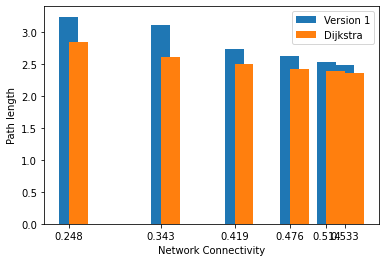

In [310]:
plt.bar(average_network_connectivity, average_path_length_HG1, width=0.01963,align='edge', tick_label=[0.248, 0.343, 0.419, 0.476, 0.514, 0.533], label="Version 1")
plt.bar(average_network_connectivity_2, average_path_length_DG, width=0.01963,align='edge', tick_label=[0.248, 0.343, 0.419, 0.476, 0.514, 0.533], label="Dijkstra")
plt.xlabel("Network Connectivity")
plt.ylabel("Path length")
plt.legend()

plt.show()

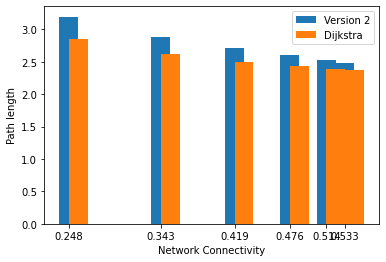

In [311]:
plt.bar(average_network_connectivity, average_path_length_HG2, width=0.01963,align='edge', tick_label=[0.248, 0.343, 0.419, 0.476, 0.514, 0.533], label="Version 2")
plt.bar(average_network_connectivity_2, average_path_length_DG, width=0.01963,align='edge', tick_label=[0.248, 0.343, 0.419, 0.476, 0.514, 0.533], label="Dijkstra")
plt.xlabel("Network Connectivity")
plt.ylabel("Path length")
plt.legend()

plt.show()

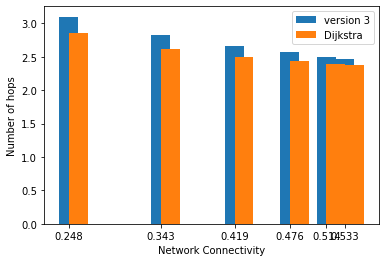

In [312]:
plt.bar(average_network_connectivity, average_path_length_HG3, width=0.01963,align='edge', tick_label=[0.248, 0.343, 0.419, 0.476, 0.514, 0.533], label="version 3")
plt.bar(average_network_connectivity_2, average_path_length_DG, width=0.01963,align='edge', tick_label=[0.248, 0.343, 0.419, 0.476, 0.514, 0.533], label="Dijkstra")
plt.xlabel("Network Connectivity")
plt.ylabel("Number of hops")
plt.legend()

plt.show()

#Note Version 3 has been Called Human Gaze Algoithm for poster 

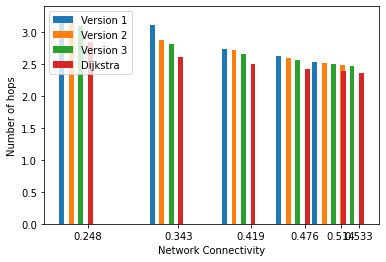

In [313]:
plt.bar(average_network_connectivity, average_path_length_HG1, width=0.005,align='edge', tick_label=[0.248, 0.343, 0.419, 0.476, 0.514, 0.533], label="Version 1")
plt.bar(average_network_connectivity_2, average_path_length_HG2, width=0.005,align='edge', tick_label=[0.248, 0.343, 0.419, 0.476, 0.514, 0.533], label="Version 2")
plt.bar(average_network_connectivity_3, average_path_length_HG3, width=0.005,align='edge', tick_label=[0.248, 0.343, 0.419, 0.476, 0.514, 0.533], label="Version 3")
plt.bar(average_network_connectivity_4, average_path_length_DG, width=0.005,align='edge', tick_label=[0.248, 0.343, 0.419, 0.476, 0.514, 0.533], label="Dijkstra")
plt.xlabel("Network Connectivity")
plt.ylabel("Number of hops")
plt.legend()

plt.show()

In [314]:
def compare_runtime_2(path1, path2): # comparind individual paths
    start_time_1 = time.time()
    path1
    end_time_1 = time.time()
    
    start_time_2 = time.time()
    path2
    end_time_2 = time.time()
    return (end_time_1-start_time_1,end_time_2-start_time_2)

In [316]:
compare_runtime_2(nx.dijkstra_path(G_list[3], 0, 6), Human_gaze_algorithm(G_list[3], 0, 6, pos_G_list[6]))

(0.0, 0.0)

In [317]:
compare_runtime_2(nx.dijkstra_path(G_list[3], 0, 6), Human_gaze_algorithm_2(G_list[3], 0, 6, pos_G_list[6]))

(0.0, 0.0)

In [318]:
compare_runtime_2(nx.dijkstra_path(G_list[3], 0, 6), Human_gaze_algorithm_3(G_list[3], 0, 6, pos_G_list[6]))

(0.0, 1.1920928955078125e-06)

In [319]:
compare_runtime_2(nx.dijkstra_path(G_list[15], 0, 6), Human_gaze_algorithm(G_list[25], 0, 6, pos_G_list[6]))

(9.5367431640625e-07, 9.5367431640625e-07)

In [320]:
compare_runtime_2(nx.dijkstra_path(G_list[15], 0, 6), Human_gaze_algorithm_2(G_list[25], 0, 6, pos_G_list[6]))

(9.5367431640625e-07, 0.0)

In [321]:
compare_runtime_2(nx.dijkstra_path(G_list[15], 0, 6), Human_gaze_algorithm_3(G_list[25], 0, 6, pos_G_list[6]))

(9.5367431640625e-07, 0.0)